<a href="https://colab.research.google.com/github/AndreyLFR/Library_np_pd/blob/master/lesson_Numpy_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LESSON 3. Обучение с учителем

Task1

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Загрузка датасета через import sklearn.datasets.load_boston ограничена по этическим причинам. При этом скачать датасет возможно

In [71]:
df = pd.read_csv("/content/sample_data/boston_house_prices.csv", header=None)
df.columns = df.iloc[1]
df = df.drop(df.index[:2])
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


*   **CRIM** Уровень преступности на душу населения по городам
*   **ZN** Доля жилых земель, зонированных для участков площадью более 25 000 кв. футов.
*   **INDUS** Доля площадей под неторговую деятельность на город
*   **CHAS** Фиктивная переменная Charles River (= 1, если участок граничит с рекой; 0 в противном случае)
*   **NOX**  Концентрация оксидов азота NOX (частей на 10 миллионов)
*   **RM** Среднее количество комнат на жилище
*   **AGE** Доля квартир, занимаемых владельцами построено до 1940 г.
*   **DIS** взвешенное расстояние до пяти центров занятости в Бостоне
*   **RAD**  Индекс RAD доступности радиальных автомагистралей
*   **TAX** Полная ставка налога на имущество на 10 000 долларов США
*   **PIRATIO** Соотношение учеников и учителей по городам
*   **B** 1000(Bk - 0,63)^2, где Bk — пропорция чернокожих по городам
*   **LSTAT** % более низкого статуса населения
*   **MEDV** Медианная стоимость домов, занимаемых владельцами, в 1000 долларов США

In [72]:
df.head()

1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [73]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object', name=1)

In [74]:
df[['CHAS', 'RAD', 'TAX']] = df[['CHAS', 'RAD', 'TAX']].astype('int64')
df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']] = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Работа с target

In [75]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

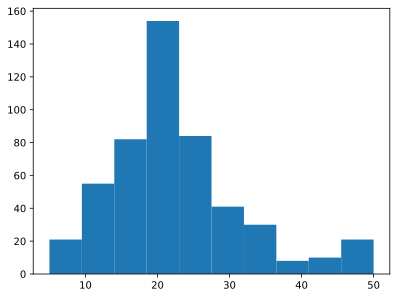

In [76]:
plt.hist(df['MEDV'])
plt.show()

В target отсутствуют значимые выбросы.
Исследуем оставшиеся атрибуты.

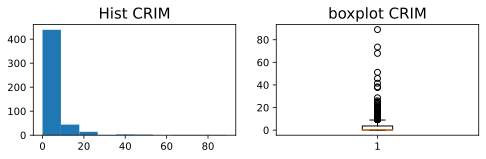

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64


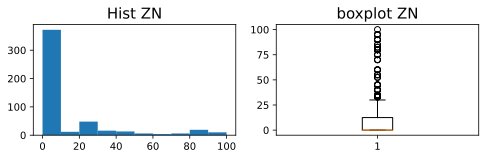

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64


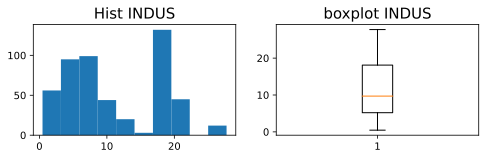

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64


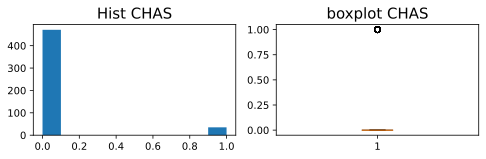

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64


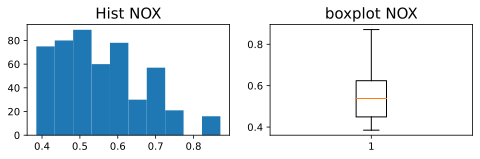

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64


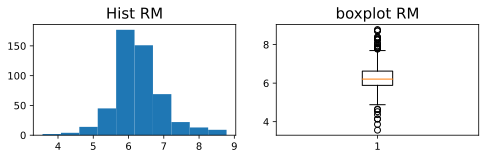

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64


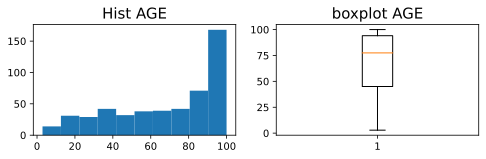

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


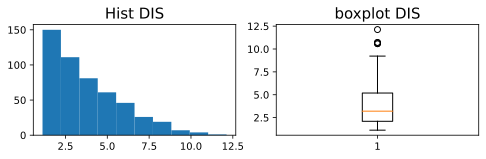

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64


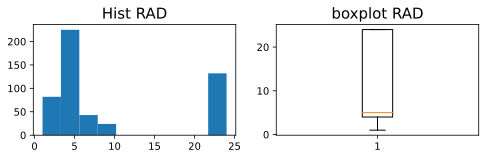

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64


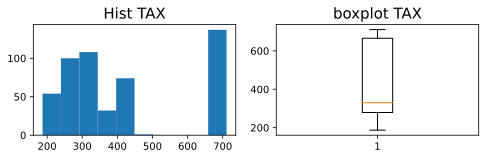

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64


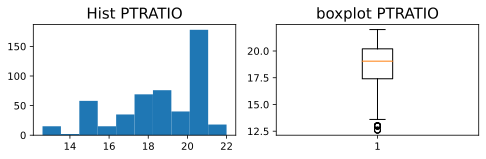

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


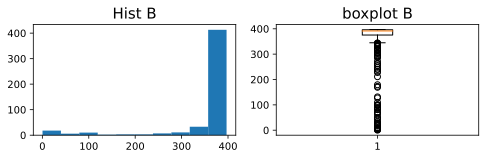

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64


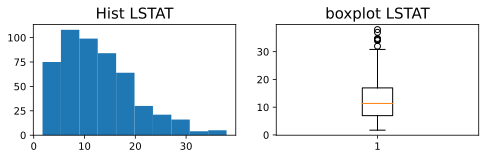

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64


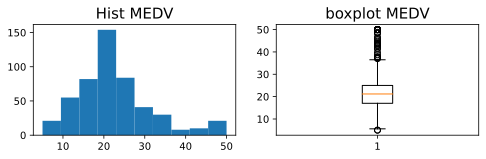

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


<Figure size 640x480 with 0 Axes>

In [77]:
for col in list(df):
  fig, ax = plt.subplots(1, 2, figsize=[8, 2])
  c1 = ax[0].hist(df[col])
  ax[0].set_title(f'Hist {col}', fontsize=15)
  c2 = ax[1].boxplot(df[col])
  ax[1].set_title(f'boxplot {col}', fontsize=15)
  plt.show()
  print(df[col].describe())

plt.subplots_adjust(wspace= 0.3, hspace=0.3)

CRIM исследуем

In [78]:
df[df['CRIM']>20]

1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
378,23.6482,0.0,18.1,0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69,13.1
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
384,20.0849,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
386,24.3938,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
387,22.5971,0.0,18.1,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
400,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
403,24.8017,0.0,18.1,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [79]:
len(df[df['CRIM']>20])

18

In [80]:
df = df[df['CRIM'] < 20]
df['CRIM'].describe()

count    488.000000
mean       2.347647
std        4.128761
min        0.006320
25%        0.079365
50%        0.229015
75%        2.396175
max       19.609100
Name: CRIM, dtype: float64

In [81]:
X = df.loc[:, df.columns !='MEDV']
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("r2_score: \n", r2_score(y_test, y_pred))

r2_score: 
 0.7029771655732078


Task2

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
y_train = y_train.astype('int')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2_score: \n", r2_score(y_test, y_pred))

r2_score: 
 0.7962359140437538


Task3

In [84]:
?RandomForestClassifier

In [85]:
import matplotlib.pyplot as plt

feature_names = list(X.columns)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

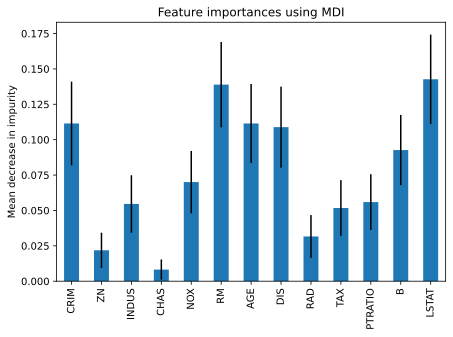

In [86]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

LSTAT and RM

LESSON 2. Matplotlib

Task1

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

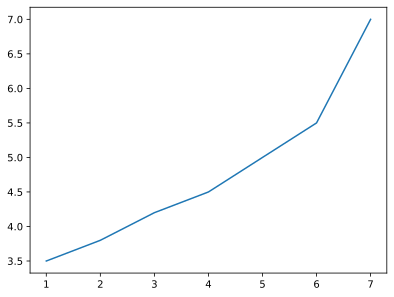

In [88]:
x = np.arange(1, 8)
y = np.array([3.5, 3.8, 4.2, 4.5, 5, 5.5, 7])

plt.plot(x, y)
plt.show()

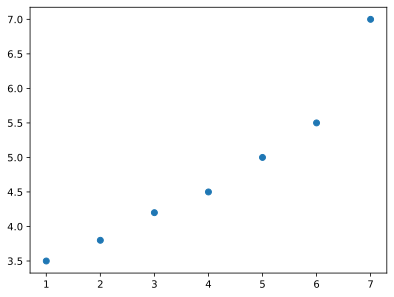

In [89]:
plt.scatter(x, y)
plt.show()

Task2

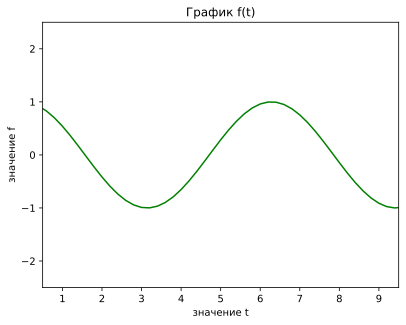

In [90]:
t = np.linspace(0, 10, num=51, endpoint=True)
f = np.cos(t)
plt.plot(t,f,color='g')
plt.title('График f(t)')
plt.xlabel('значение t')
plt.ylabel('значение f')
plt.xlim(0.5, 9.5)
plt.ylim(-2.5, 2.5)
plt.show()

Task3

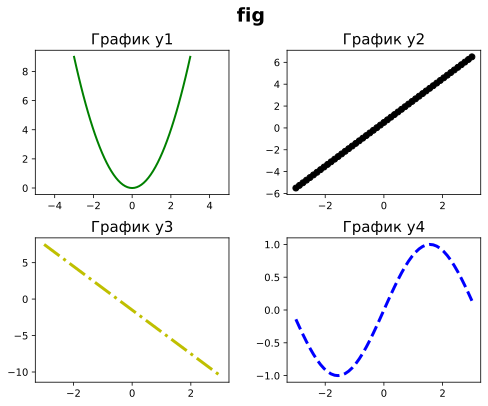

In [91]:
x = np.linspace(-3, 3, num=51, endpoint=True)
y1 = x**2
y2 = 2*x + 0.5
y3 = -3*x - 1.5
y4 = np.sin(x)

fig, ax = plt.subplots(2, 2, figsize=[8, 6])
fig.suptitle('fig', fontsize=19, fontweight='bold')
c1 = ax[0,0].plot(x, y1, 'g', linewidth=2)
ax[0,0].set_title('График y1', fontsize=15)
ax[0,0].set_xlim([-5, 5])

c2 = ax[0,1].scatter(x, y2, color='k')
ax[0,1].set_title('График y2', fontsize=15)

c3 = ax[1,0].plot(x, y3, '-.y', linewidth=3)
ax[1,0].set_title('График y3', fontsize=15)

c4 = ax[1,1].plot(x, y4, '--b', linewidth=3)
ax[1,1].set_title('График y4', fontsize=15)

plt.subplots_adjust(wspace= 0.3,
                    hspace=0.3)

plt.show()

Task4

In [92]:
import pandas as pd

In [93]:
df = pd.read_csv('/content/sample_data/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61491 entries, 0 to 61490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    61491 non-null  int64  
 1   V1      61491 non-null  float64
 2   V2      61491 non-null  float64
 3   V3      61491 non-null  float64
 4   V4      61491 non-null  float64
 5   V5      61491 non-null  float64
 6   V6      61491 non-null  float64
 7   V7      61491 non-null  float64
 8   V8      61491 non-null  float64
 9   V9      61491 non-null  float64
 10  V10     61491 non-null  float64
 11  V11     61491 non-null  float64
 12  V12     61491 non-null  float64
 13  V13     61491 non-null  float64
 14  V14     61491 non-null  float64
 15  V15     61491 non-null  float64
 16  V16     61491 non-null  float64
 17  V17     61491 non-null  float64
 18  V18     61491 non-null  float64
 19  V19     61491 non-null  float64
 20  V20     61491 non-null  float64
 21  V21     61491 non-null  float64
 22

[]

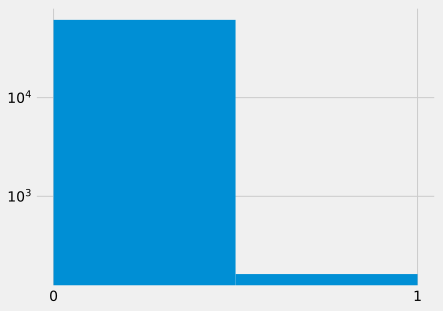

In [94]:
df['Class'].value_counts()
target = df['Class'].to_numpy()

plt.style.use('fivethirtyeight')
plt.hist(target, bins=2)
plt.xticks(np.arange(0, 2, 1))
plt.semilogy ()

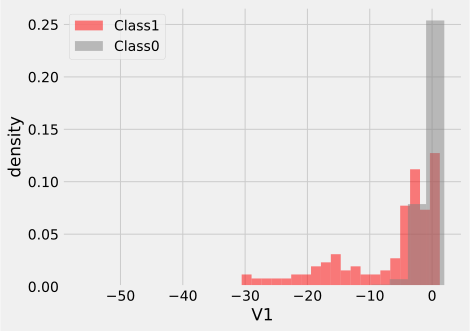

In [95]:
data1 = df.loc[(df['Class'] == 1)]
data2 = df.loc[(df['Class'] == 0)]


data1['V1'].hist(density=1 , alpha=0.5, label='Class1', color='red', bins=20)
data2['V1'].hist(density=1, alpha=0.5, label='Class0', color='grey', bins=20)
plt.legend()
plt.xlabel('V1')
plt.ylabel('density')
plt.show()

Задание на повторение

In [96]:
a = np.linspace(12, 24, num=12, endpoint=False, dtype = int)
a

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [97]:
b = np.asarray([[x] for x in a]).reshape(4, 3)
b

array([[12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]])

In [98]:
b = np.asarray([[x] for x in a]).reshape(2, 6)
b

array([[12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [99]:
b = np.asarray([[x] for x in a]).reshape(6, 2)
b

array([[12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

LESSON 1. Numpy

Task1

In [100]:
import numpy as np

In [101]:
a = np.array([[1, 2, 3, 3, 1], [6, 8, 11, 10, 7]]).transpose()
mean_a = np.mean(a, axis=0)
mean_a

array([2. , 8.4])

Task2

In [102]:
a_centered = a - mean_a
a_centered.shape

(5, 2)

In [103]:
a_centered

array([[-1. , -2.4],
       [ 0. , -0.4],
       [ 1. ,  2.6],
       [ 1. ,  1.6],
       [-1. , -1.4]])

Task3

In [104]:
a_centered_sp = np.dot(a_centered[:, 0], a_centered[:, 1])
a_centered_sp / (a.shape[0] - 1)

2.0

Task4

In [105]:
np.cov(a.transpose())[0, 1]

2.0

PANDAS
Task1

In [106]:
import pandas as pd


authors = pd.DataFrame()
authors['author_id'] = [1, 2, 3]
authors['author_name'] = ['Тургенев', 'Чехов', 'Островский']

book = pd.DataFrame()
book['author_id'] = [1, 1, 1, 2, 2, 3, 3]
book['book_title'] = ['Отцы и дети', 'Рудин', 'Дворянское гнездо', 'Толстый и тонкий', 'Дама с собачкой', 'Гроза', 'Таланты и поклонники']
book['price'] = [500, 400, 300, 350, 450, 600, 200]

Task2

In [107]:
authors_price = pd.merge(authors, book, left_on='author_id', right_on='author_id', how='right')
authors_price

,author_id,author_name,book_title,price
0,1,Тургенев,Отцы и дети,500
1,1,Тургенев,Рудин,400
2,1,Тургенев,Дворянское гнездо,300
3,2,Чехов,Толстый и тонкий,350
4,2,Чехов,Дама с собачкой,450
5,3,Островский,Гроза,600
6,3,Островский,Таланты и поклонники,200


Task3

In [108]:
top_5 = authors_price.sort_values(by='price', ascending=False).head(5)
top_5

,author_id,author_name,book_title,price
5,3,Островский,Гроза,600
0,1,Тургенев,Отцы и дети,500
4,2,Чехов,Дама с собачкой,450
1,1,Тургенев,Рудин,400
3,2,Чехов,Толстый и тонкий,350


Task4

In [109]:
def stat_prm(df, author_name):
    mean_ = df.loc[df['author_name'] == author_name, 'price'].mean()
    max_ = df.loc[df['author_name'] == author_name, 'price'].max()
    min_ = df.loc[df['author_name'] == author_name, 'price'].min()
    return [mean_, max_, min_]

authors_stat = pd.DataFrame(columns=['author_name', 'min_price', 'max_price', 'mean_price'])
authors_stat['author_name'] = authors_price['author_name'].unique()

authors_stat['min_price'] = authors_stat['author_name'].apply ( lambda x: stat_prm(authors_price, x)[2])
authors_stat['max_price'] = authors_stat['author_name'].apply ( lambda x: stat_prm(authors_price, x)[1])
authors_stat['mean_price'] = authors_stat['author_name'].apply ( lambda x: stat_prm(authors_price, x)[0])

authors_stat

,author_name,min_price,max_price,mean_price
0,Тургенев,300,500,400.0
1,Чехов,350,450,400.0
2,Островский,200,600,400.0


Task5

In [110]:
authors_price['cover'] = ['твердая', 'мягкая', 'мягкая', 'твердая', 'твердая', 'мягкая', 'мягкая']
?pd.pivot_table

In [111]:
authors_price

,author_id,author_name,book_title,price,cover
0,1,Тургенев,Отцы и дети,500,твердая
1,1,Тургенев,Рудин,400,мягкая
2,1,Тургенев,Дворянское гнездо,300,мягкая
3,2,Чехов,Толстый и тонкий,350,твердая
4,2,Чехов,Дама с собачкой,450,твердая
5,3,Островский,Гроза,600,мягкая
6,3,Островский,Таланты и поклонники,200,мягкая


In [112]:
df = authors_price[['author_name', 'price', 'cover']]
book_info = df.pivot_table(index=['author_name'], columns=['cover'], aggfunc=[np.sum], fill_value= 0)
book_info

sum        
             price        
cover       мягкая твердая
author_name               
Островский     800       0
Тургенев       700     500
Чехов            0     800

In [113]:
import pickle

with open('book_info.pkl', 'wb') as f:
     pickle.dump(book_info, f)

with open('book_info.pkl', 'rb') as f:
     book_info2 = pickle.load(f)

book_info2

sum        
             price        
cover       мягкая твердая
author_name               
Островский     800       0
Тургенев       700     500
Чехов            0     800